In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load processed dataset

In [ ]:
# Load data
df = pd.read_csv('./preprocessed_data.csv')

# Train-test split
X = df.drop(['Default'], axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42 
)

# Decision Tree

In [ ]:
#Plotting the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42 
)

#Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20, min_samples_leaf=2)

classifier.fit(X_train, y_train)  # Train the model
y_pred = classifier.predict(X_test)  # Make predictions

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.46      0.06      0.11      8896

    accuracy                           0.88     76605
   macro avg       0.67      0.53      0.52     76605
weighted avg       0.84      0.88      0.84     76605



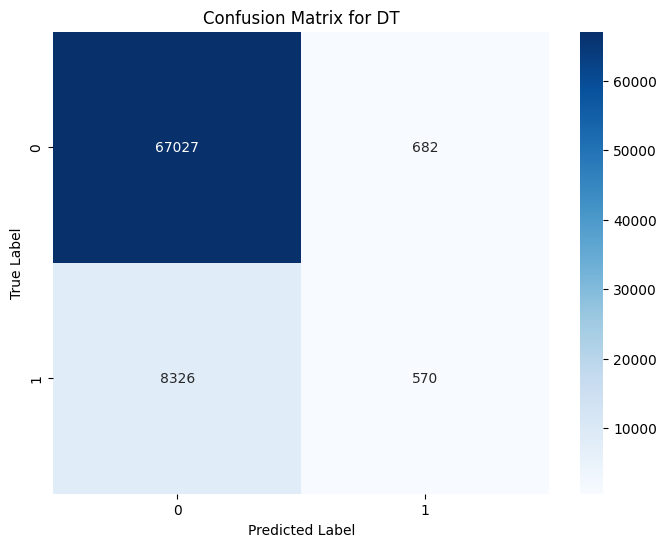

In [81]:
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

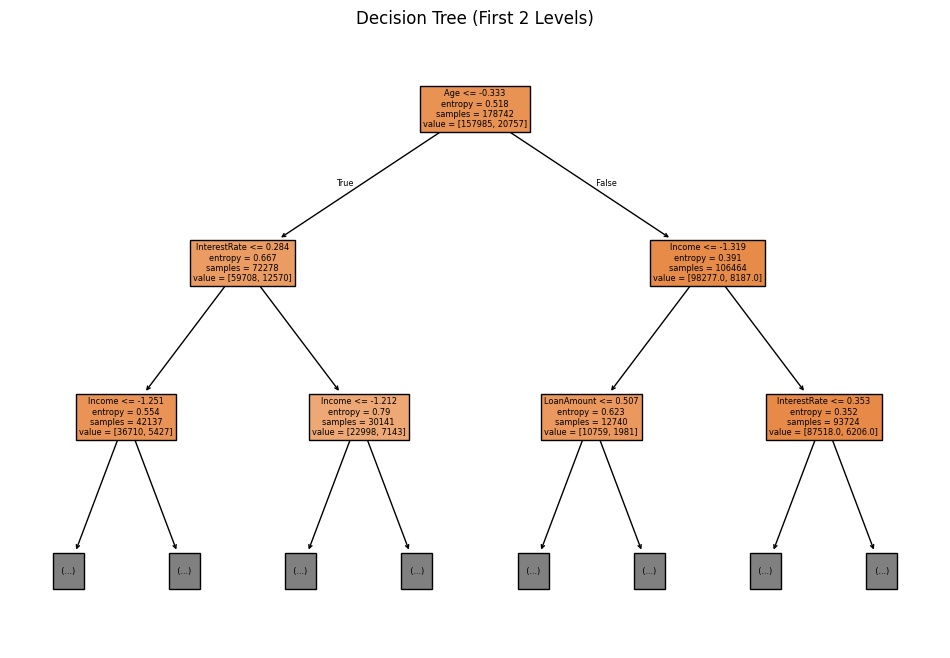

In [82]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=X.columns, max_depth=2)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Define the model
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Set the parameter distribution
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 5, 10, 20],
}

# Define the cross-validation (cv) strategy
cv_dt = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring='f1',  # Use F1 scoring to account for imbalanced dataset
    cv=cv_dt,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_dt.best_params_)
print('Best cross-validation score using F1:', grid_search_dt.best_score_)

# Evaluate the best model on the test data
best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)

# Print evaluation metrics
print("F1:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score using F1: 0.20997276191602596
F1: 0.21024924795874517
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     67709
           1       0.20      0.22      0.21      8896

    accuracy                           0.81     76605
   macro avg       0.55      0.55      0.55     76605
weighted avg       0.82      0.81      0.81     76605



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Define the model
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Set the parameter distribution
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 5, 10, 20],
}

# Define the cross-validation (cv) strategy
cv_dt = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform RandomizedSearchCV with cross-validation
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='f1',  # Use F1 scoring to account for imbalanced dataset
    cv=cv_dt,
    random_state=42,
    n_jobs=-1  # Use all available cores
    verbose=1
)

# Fit the random search
random_search_dt.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search_dt.best_params_)
print('Best cross-validation score using F1:', random_search_dt.best_score_)

# Evaluate the best model on the test data
best_dt = random_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)

# Print evaluation metrics
print("F1:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_depth': None}
Best cross-validation score using F1: 0.20604910848856955
F1: 0.21095113438045376
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     67709
           1       0.20      0.22      0.21      8896

    accuracy                           0.81     76605
   macro avg       0.55      0.55      0.55     76605
weighted avg       0.82      0.81      0.81     76605



<p>DT before tuning</p>
<br>

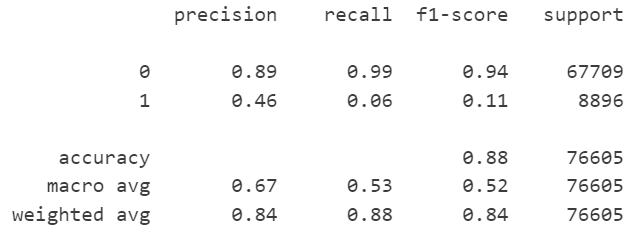

<p>DT after hyperparameter tuning with training data using Grid Search</p>
<br>

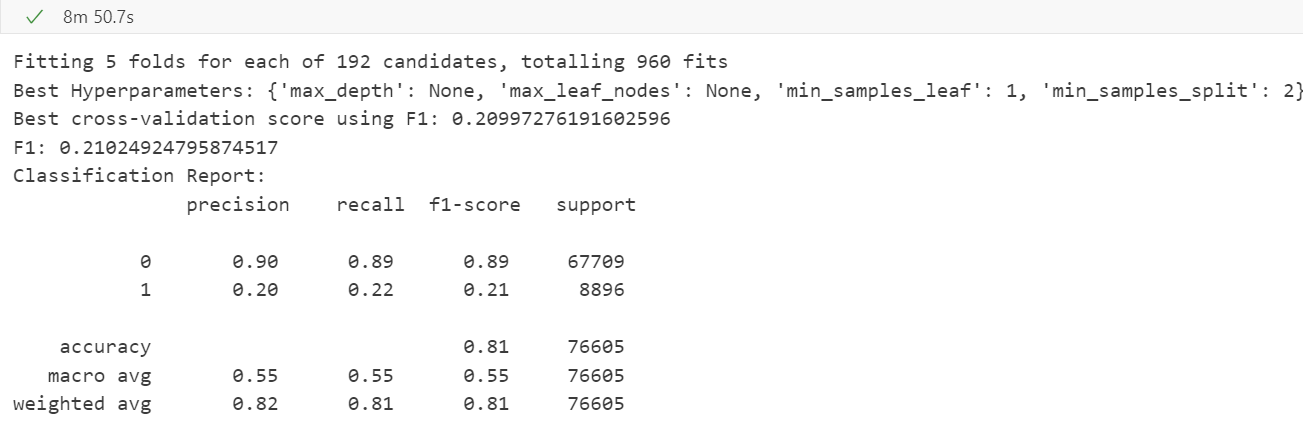

<p>DT after hyperparameter tuning with training data using Random Search</p>
<br>

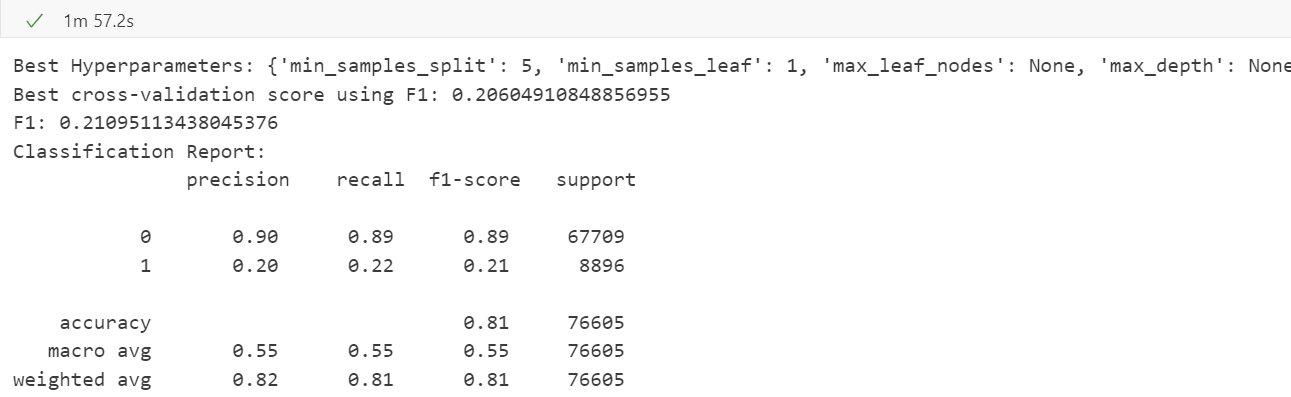

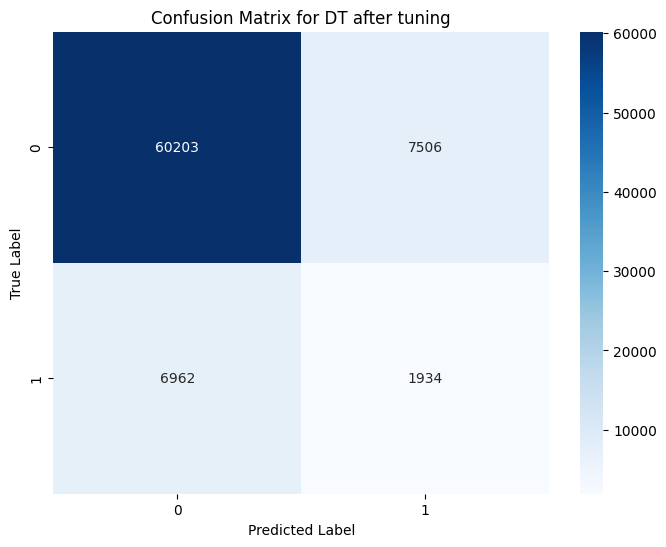

In [91]:
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for DT after tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrices
<br>

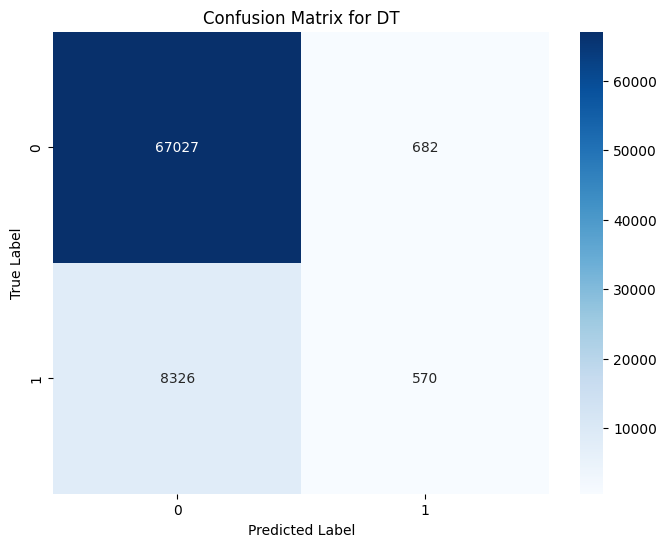
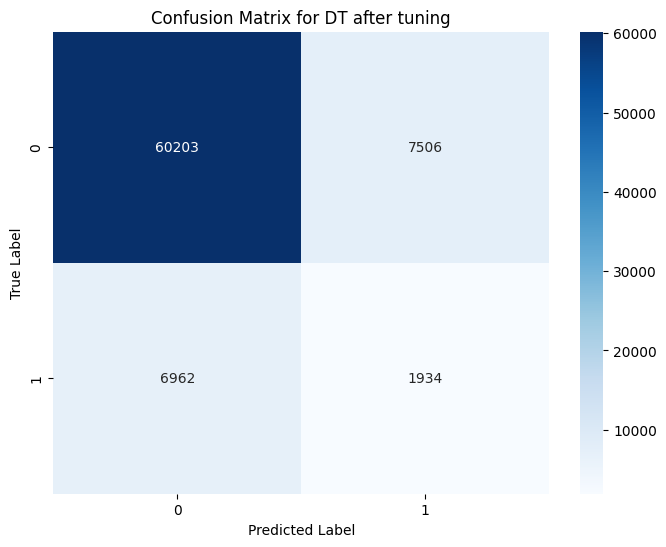

## KNN

In [92]:
# KNN with default settings before tuning
from sklearn.neighbors import KNeighborsClassifier

knn_base = KNeighborsClassifier()
knn_base.fit(X_train, y_train)
y_pred_base = knn_base.predict(X_test)
accuracy = knn_base.score(X_test, y_test)
# print(f'Accuracy: {accuracy:.2f}')
print("KNN Classification Report before tuning:\n", classification_report(y_test, y_pred_base))

KNN Classification Report before tuning:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     67709
           1       0.12      0.01      0.02      8896

    accuracy                           0.87     76605
   macro avg       0.50      0.50      0.48     76605
weighted avg       0.80      0.87      0.83     76605



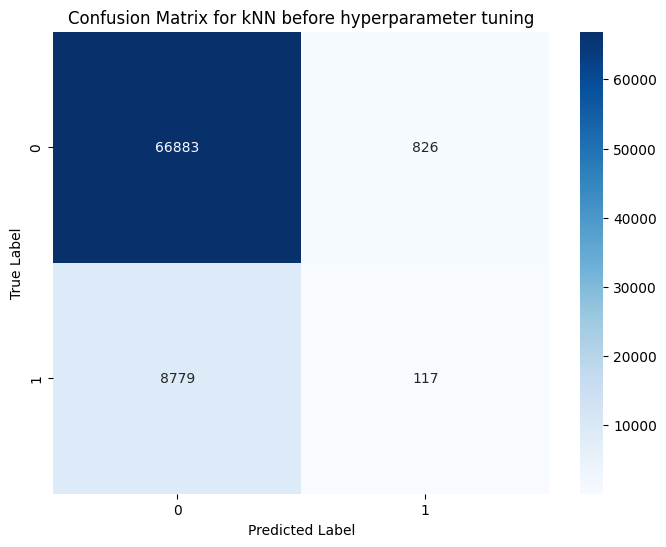

In [86]:
cm = confusion_matrix(y_test, y_pred_base)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for kNN before hyperparameter tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Cross-validation strategy
cv_knn = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

random_search = HalvingRandomSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    scoring='f1',
    cv=cv_knn,
    factor=2,  # Reduce configurations by a factor of 2 at each iteration
    random_state=42,
    n_jobs=-1
    verbose=1
)

# Fit the random search
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best cross-validation score using F1:", random_search.best_score_)

# Evaluate the best model on the test data
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Print evaluation metrics
print("F1:", f1_score(y_test, y_pred))
print("Classification Report for knn after tuning:\n", classification_report(y_test, y_pred))

c:\Users\jenif\anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=8937. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
Best cross-validation score using F1: 0.0
F1: 0.05977840762690028
Classification Report for knn after tuning:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     67709
           1       0.13      0.04      0.06      8896

    accuracy                           0.86     76605
   macro avg       0.51      0.50      0.49     76605
weighted avg       0.80      0.86      0.82     76605



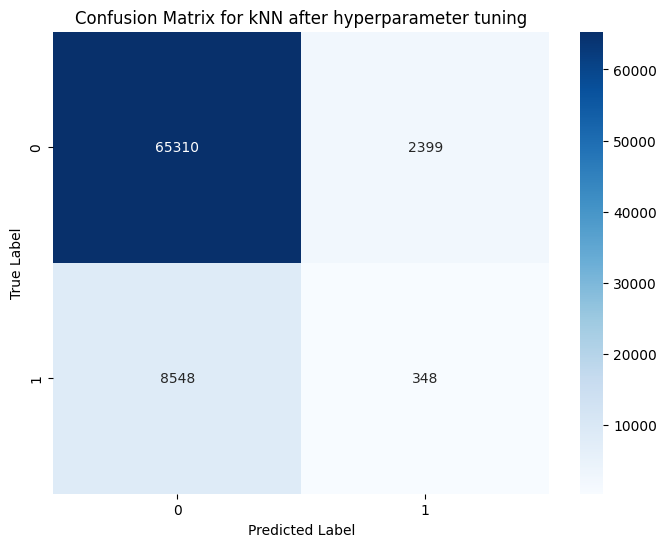

In [88]:
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for kNN after hyperparameter tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

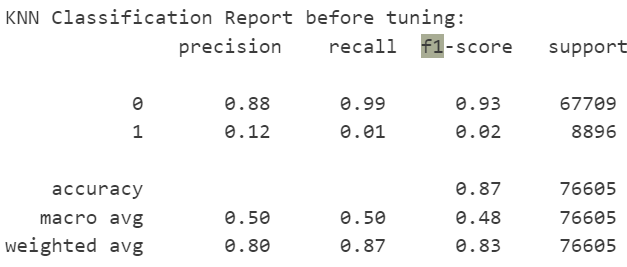

<br>
<p>Using halving random search</p>

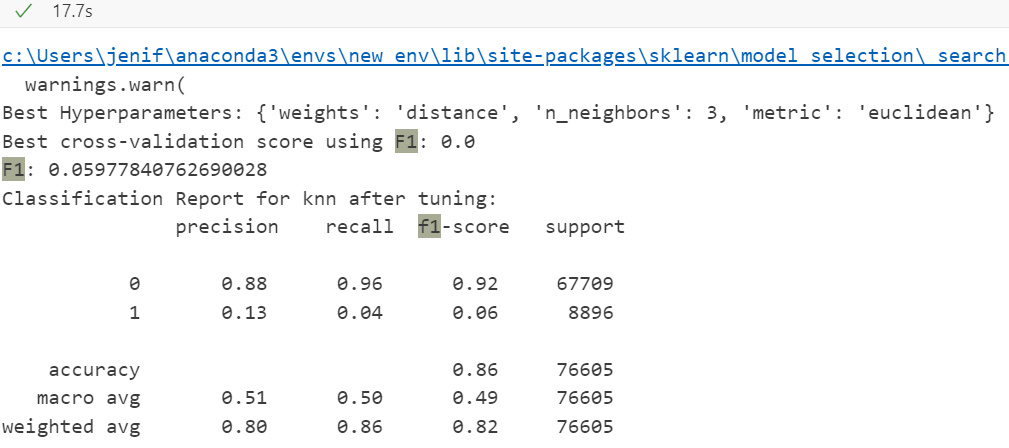

<br>
<p>Using regular random search</p>

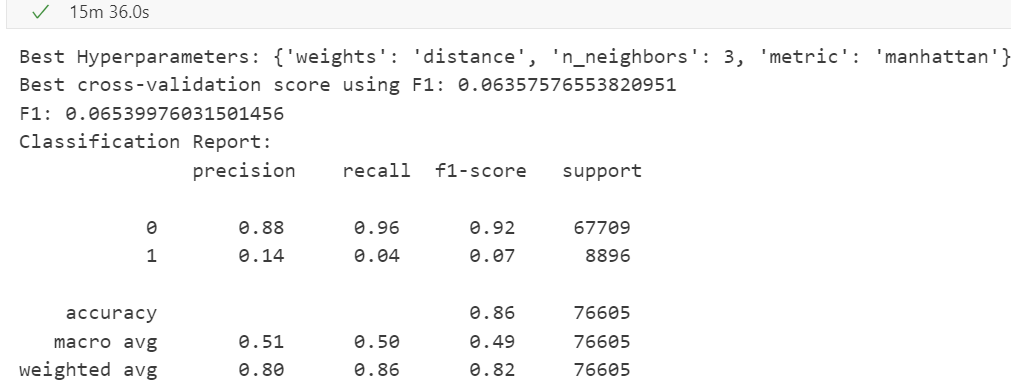

Confusion matrices
<br>

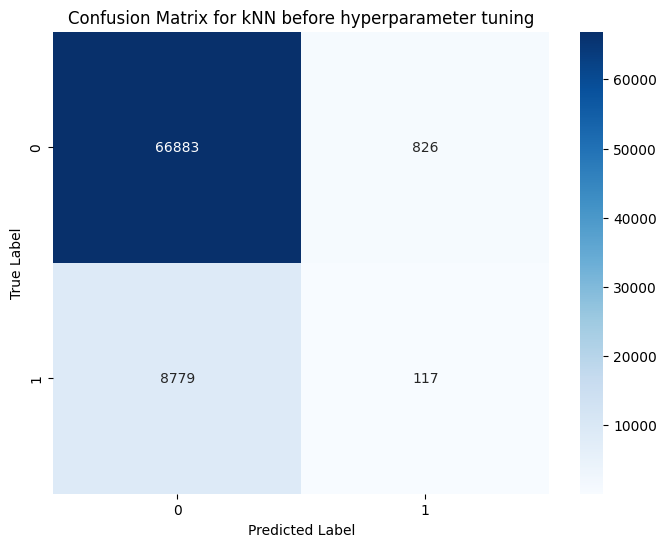
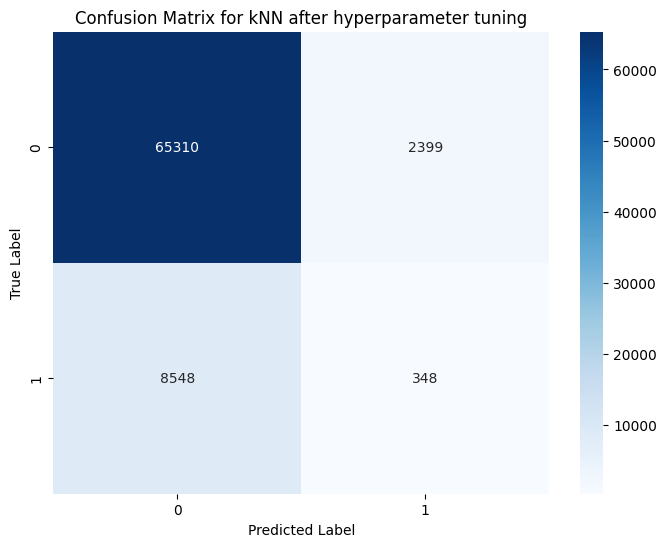
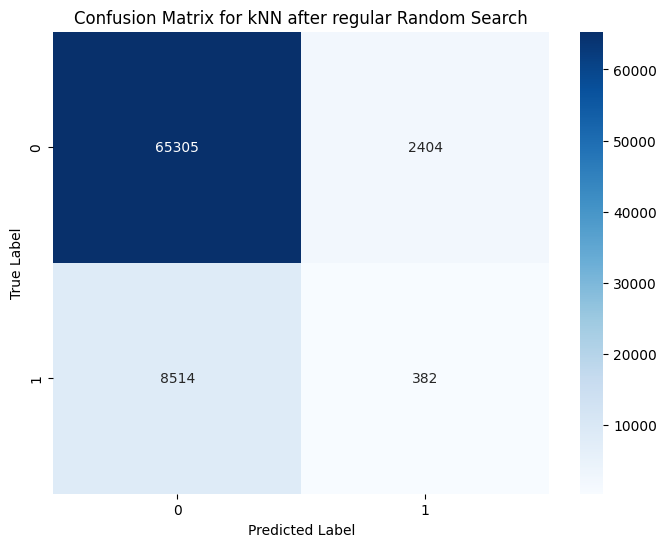